In [1]:
%pylab inline
import pandas as pd
import numpy as np
TotalStations = pd.read_csv('Et1_Et2_Et3.csv',index_col=0,parse_dates=True)
TotalStations.head()

Populating the interactive namespace from numpy and matplotlib


,Et1,Et2,Et3
Date,,,
2008-05-01,4.77,3.94,3.39
2008-05-02,5.22,3.89,3.17
2008-05-03,5.03,3.57,2.93
2008-05-04,5.44,4.19,2.97
2008-05-05,4.67,4.27,2.66


(array([14031, 14061, 14092, 14123, 14153, 14184, 14214, 14245, 14276,
        14304, 14335, 14365, 14396, 14426, 14440], dtype=int64),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

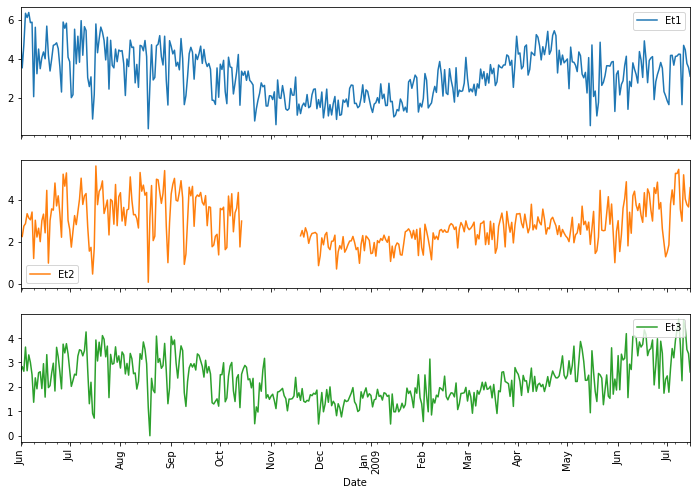

In [2]:
TotalStations.loc['2008-06-01':'2009-07-15'].plot(subplots=True, figsize=(12, 8)); plt.legend(loc='upper right')
xticks(rotation='vertical')

In [3]:
import datetime
#we create a date column to extract the week number
TotalStations['date']=TotalStations.index
#apply a lambda function to the whole panda dataframe column
TotalStations['week'] = TotalStations['date'].apply(lambda x: x.isocalendar()[1])
#drop the date column because we dont need it
del TotalStations['date']
#let see our dataframe
TotalStations.head()

,Et1,Et2,Et3,week
Date,,,,
2008-05-01,4.77,3.94,3.39,18
2008-05-02,5.22,3.89,3.17,18
2008-05-03,5.03,3.57,2.93,18
2008-05-04,5.44,4.19,2.97,18
2008-05-05,4.67,4.27,2.66,19


<AxesSubplot:>

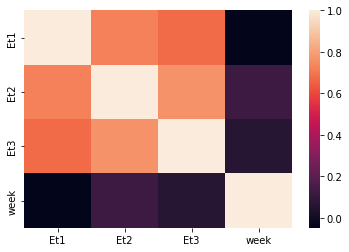

In [4]:
#creation of a correlation plot with seaborn
import seaborn as sns
corr = TotalStations.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
#Definition of training sets
X_train = TotalStations.loc['2008-06-01':'2008-08-09',['Et1','Et3','week']].astype(float32).values#,'week']] # Et 1, 3 and #week
y_train = TotalStations.loc['2008-06-01':'2008-08-09','Et2'].astype(float32).values # Et 2

In [6]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

In [7]:
X_train[:80]

array([[ 6.18714750e-01, -2.94258922e-01, -1.85142863e+00],
       [-6.47757769e-01, -1.33158057e-03, -1.50582862e+00],
       [ 3.43756616e-01, -2.54314035e-01, -1.50582862e+00],
       [ 1.69354975e+00,  1.06385887e+00, -1.50582862e+00],
       [ 1.51024437e+00, -2.27684289e-01, -1.50582862e+00],
       [ 1.72687793e+00,  6.37782574e-01, -1.50582862e+00],
       [ 1.29361105e+00,  2.25021437e-01, -1.50582862e+00],
       [ 1.31027520e+00, -4.40722466e-01, -1.50582862e+00],
       [-1.88090193e+00, -1.94530356e+00, -1.16022861e+00],
       [ 1.09364164e+00, -6.13816023e-01, -1.16022861e+00],
       [-8.97719383e-01, -1.21298540e+00, -1.16022861e+00],
       [ 1.60451576e-01, -3.34203541e-01, -1.16022861e+00],
       [-6.81085944e-01, -2.80944079e-01, -1.16022861e+00],
       [-2.06158876e-01, -1.19967055e+00, -1.16022861e+00],
       [ 3.54706831e-02,  1.58447117e-01, -1.16022861e+00],
       [-2.56151140e-01, -1.66569114e+00, -8.14628601e-01],
       [ 1.14363384e+00,  6.51097417e-01

In [8]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(24, activation='linear', input_shape=(3,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=200,verbose=0)

In [10]:
y_pred = model.predict(X_train)
y_pred[:20]

array([[2.984999 ],
       [2.4709725],
       [2.9522867],
       [4.195272 ],
       [3.6331694],
       [4.063831 ],
       [3.6685085],
       [3.4427476],
       [1.1853435],
       [3.3682952],
       [2.0101845],
       [2.929969 ],
       [2.4643807],
       [2.4129763],
       [3.0321877],
       [2.330893 ],
       [3.9556856],
       [2.6055968],
       [2.2499645],
       [2.7920966]], dtype=float32)

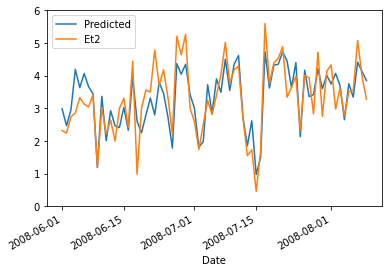

In [11]:
plot(TotalStations.loc['2008-06-01':'2008-08-09'].index,y_pred,label='Predicted')
TotalStations['Et2'].loc['2008-06-01':'2008-08-09'].plot()
figsize(12,8)
ylim(0,6)
legend(loc='best')

# Predict the missing data in between 2008-10-15:2009-03-20¶

In [12]:
#Get the prediction for the train set
X_missing = TotalStations.loc['2008-10-15':'2008-11-18',['Et1','Et3','week']].astype(float32).values

In [13]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_missing)

# Scale the train set
X_missing = scaler.transform(X_missing)

In [14]:
y_missing = model.predict(X_missing)
y_missing = y_missing.reshape([35]).tolist()

In [15]:
TotalStations['Et2_Gap_Filled']=TotalStations['Et2']
TotalStations['Et2_Gap_Filled'].loc['2008-10-15':'2008-11-18']=y_missing

C:\Users\TB\Miniconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0.0, 6.0)

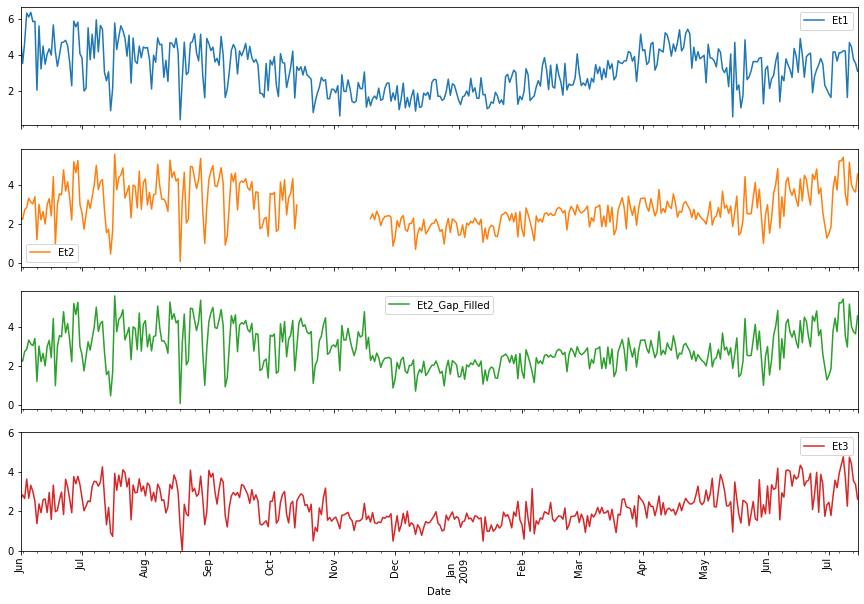

In [16]:
TotalStations.loc['2008-06-01':'2009-07-15',['Et1','Et2','Et2_Gap_Filled','Et3']].plot(subplots=True, 
                                                   figsize=(15, 10)); plt.legend(loc='upper right')
xticks(rotation='vertical')
ylim(0,6)

In [17]:
print(y_missing)

[4.202113628387451, 4.459836483001709, 4.028980255126953, 4.1159749031066895, 3.7418267726898193, 3.649930238723755, 3.771951675415039, 1.0993378162384033, 2.0357444286346436, 2.2811172008514404, 3.2988011837005615, 3.5394835472106934, 4.12825345993042, 4.473534107208252, 2.59744930267334, 2.6829843521118164, 3.007007598876953, 3.0781290531158447, 2.9692320823669434, 3.359736680984497, 1.7547599077224731, 4.080111980438232, 3.3283724784851074, 3.340118885040283, 3.930943250656128, 3.3407630920410156, 2.8950700759887695, 2.531460762023926, 2.899458885192871, 3.7547597885131836, 3.484646797180176, 3.5518531799316406, 4.788447856903076, 2.8770930767059326, 3.466498374938965]
